In [2]:
from imports import *
plt.rc('figure', max_open_warning=200)
%matplotlib inline
sns.set_theme()

In [3]:

ft_dir_path ='features'
print(ft_dir_path)

features


In [4]:
# Frequency bands

bands = [(0.9, 4, 'Delta (0.9-4 Hz)', 'D'), (4, 8, 'Theta (4-8 Hz)', 'T'), (8, 14, 'Alpha (8-14 Hz)', 'A'), 
         (14, 25, 'Beta (14-25 Hz)', 'B'), (25, 40, 'Gamma (25-40 Hz)', 'G')]
str_freq = [bands[i][3] for i in range(len(bands))]
n_freq = len(str_freq)


In [5]:
# Localization by scalp regions

regions = [(['Fp1','Fp2','Fpz'], 'Fp', 'Pre-frontal'),
           (['AF7, AF3','AF4','AF8'], 'AF', 'In-between frontal'),
           (['F9','F7','F5','F3','FT9','FT7','FC5','FC3'], 'LF', 'Left Frontal'),
           (['F1','Fz','F2','FC1','FCz','FC2'], 'MF', 'Midline Frontal'),
           (['F4','F6','F8','F10','FC4','FC6','FT8','FT10'], 'RF', 'Right Frontal'),
           (['T7','TP9','TP7'], 'LT', 'Left Temporal'),
           (['T8','TP8','TP10'], 'RT', 'Right Temporal'),
           (['C5','C3','CP5','CP3'], 'LC', 'Left Central'),
           (['C1','Cz','C2','CP1','CPz', 'CP2'], 'MC', 'Midline Central'),
           (['C4','C6','CP4','CP6'], 'RC', 'Right Central'),
           (['P9','P7','P5','P3'], 'LP', 'Left Parietal'),
           (['P1','Pz','P2'], 'MP', 'Midline Parietal'),
           (['P4','P6','P8','P10'], 'RP', 'Right Parietal'),
           (['PO9','PO7','PO3','O1'], 'LO', 'Left Occipital'),
           (['POz','Oz'], 'MO', 'Midline Occipital'),
           (['PO4','PO8','PO10','O2'], 'RO', 'Right Occipital')]

n_regions = len(regions)




In [6]:
# Loading epochs

sec5_epochs = mne.read_epochs('epochs.fif')
print(sec5_epochs.get_data().shape)

sampling_rate = sec5_epochs.info['sfreq']
n_samples = sec5_epochs.__len__()
n_times = len(sec5_epochs.get_data()[0,0,:])

ch_names = sec5_epochs.ch_names
n_channels = len(ch_names)

Reading /Users/savochkin/epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
357 matching events found
No baseline correction applied
0 projection items activated
(357, 63, 1001)


In [7]:
# Loading main features DataFrames

df_ft_psd_loc_db = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_psd_loc_db.feather'))
df_ft_psd_all_db = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_psd_all_db.feather'))
df_ft_psd_ind_loc_log = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_psd_ind_loc_log.feather'))
df_ft_psd_ind_all_log = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_psd_ind_all_log.feather'))

df_ft_coh = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_coh.feather'))
df_ft_plv = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_plv.feather'))
df_ft_coh_loc = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_coh_loc.feather'))
df_ft_plv_loc = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_plv_loc.feather'))

df_ft_coh_ind_loc = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_coh_ind_loc.feather'))
df_ft_plv_ind_loc = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_plv_ind_loc.feather'))
df_ft_coh_ind_all = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_coh_ind_all.feather'))
df_ft_plv_ind_all = pd.read_feather(os.path.join(ft_dir_path, 'df_ft_plv_ind_all.feather'))

In [8]:
# Scaling features data

# PSD & PSD indices
ft_psd_loc_db_sc = StandardScaler().fit_transform(df_ft_psd_loc_db.to_numpy())
df_ft_psd_loc_db_sc = pd.DataFrame(ft_psd_loc_db_sc, columns=df_ft_psd_loc_db.columns)
ft_psd_all_db_sc = StandardScaler().fit_transform(df_ft_psd_all_db.to_numpy())
df_ft_psd_all_db_sc = pd.DataFrame(ft_psd_all_db_sc, columns=df_ft_psd_all_db.columns)

ft_psd_ind_loc_sc = StandardScaler().fit_transform(df_ft_psd_ind_loc_log.to_numpy())
df_ft_psd_ind_loc_sc = pd.DataFrame(ft_psd_ind_loc_sc, columns=df_ft_psd_ind_loc_log.columns)
ft_psd_ind_all_sc = StandardScaler().fit_transform(df_ft_psd_ind_all_log.to_numpy())
df_ft_psd_ind_all_sc = pd.DataFrame(ft_psd_ind_all_sc, columns=df_ft_psd_ind_all_log.columns)

# Coherence indices
ft_coh_ind_loc_sc = StandardScaler().fit_transform(df_ft_coh_ind_loc.to_numpy())
df_ft_coh_ind_loc_sc = pd.DataFrame(ft_coh_ind_loc_sc, columns=df_ft_coh_ind_loc.columns)

# PLV indices
ft_plv_ind_loc_sc = StandardScaler().fit_transform(df_ft_plv_ind_loc.to_numpy())
df_ft_plv_ind_loc_sc = pd.DataFrame(ft_plv_ind_loc_sc, columns=df_ft_plv_ind_loc.columns)


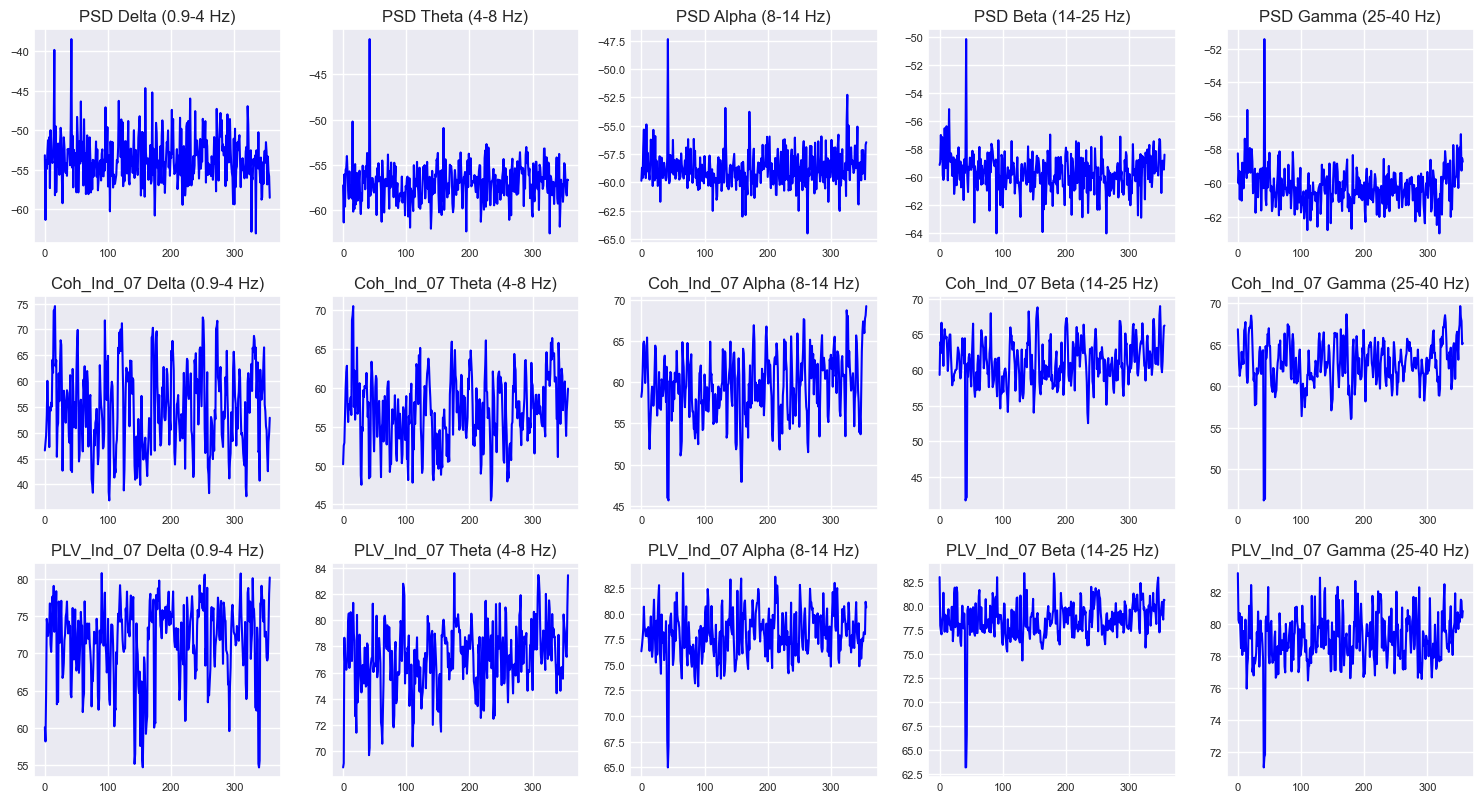

In [9]:
# Plotting overall PSD, Coherence and PLV with stage bounds

ind_rate = '07'

# Features DataFrames
df_ft_psd = df_ft_psd_all_db
df_cols = [col for col in df_ft_coh_ind_all.columns if (ind_rate in col)]
df_ft_coh = df_ft_coh_ind_all[df_cols]
df_cols = [col for col in df_ft_plv_ind_all.columns if (ind_rate in col)]
df_ft_plv = df_ft_plv_ind_all[df_cols]

# Initialize plots
n_cols = n_freq
n_rows = 3
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(3*n_cols, 3*n_rows))
plt.subplots_adjust(left=0.02)

# PSD plots (1st row)
for i in range(n_freq):
    y = df_ft_psd.to_numpy()[:,i]  
    axs[0,i].plot(y, color='blue')
    axs[0,i].set_title("PSD "+ bands[i][2])
    axs[0,i].tick_params(axis='both', labelsize=8, direction='in')
       
# Coherence plots (2nd row)
for i in range(n_freq):
    y = df_ft_coh.to_numpy()[:,i]
    axs[1,i].plot(y, color='blue')
    axs[1,i].set_title('Coh_Ind_'+ind_rate+' '+bands[i][2])
    axs[1,i].tick_params(axis='both', labelsize=8, direction='in')
    
# PLV plots (3rd row)
for i in range(n_freq):
    y = df_ft_plv.to_numpy()[:,i]
    axs[2,i].plot(y, color='blue')
    axs[2,i].set_title('PLV_Ind_'+ind_rate+' '+bands[i][2])
    axs[2,i].tick_params(axis='both', labelsize=8, direction='in')
    
plt.tight_layout(rect=[0,0.09,1,1])


In [17]:
# Функция для расчёта оценок качетва кластеризации
def cluster_metrics_noground(name, data, labels_pred):
    results = [name]
    df_data = pd.DataFrame(columns=['Method', 'Silh', 'Cal-Har', 'Dav-Bold'])

    # Define the metrics which require only data and predicted labels
    cluster_metrics = [
        metrics.silhouette_score,
        metrics.calinski_harabasz_score,
        metrics.davies_bouldin_score
    ]

    results += [m(data, labels_pred) for m in cluster_metrics]
    df_data.loc[0] = results
    return df_data

In [18]:
def apply_cluster_method(data, cl_method, name, df_metrics, **kwargs):
    method = cl_method(**kwargs).fit(data)
    df = cluster_metrics_noground(name, data, method.labels_)
    df_metrics = df_metrics.drop(df_metrics[df_metrics['Method']==name].index, errors='ignore')
    df_metrics = pd.concat([df_metrics, df], ignore_index=True)
    return method, df_metrics

In [19]:
# Calculating clustering noground metrics for adjacent pairs of stages (Silh, Cal-Har, Dav-Bold)
def calc_stage_metr_noground(df_features, st_edges):
    df_metrics = pd.DataFrame(columns=['Method', 'Silh', 'Cal-Har', 'Dav-Bold'])
    for _st in range(1, len(st_edges)-1):
        name = 'St'+str(_st)+'_St'+str(_st+1)
        data = df_features.iloc[st_edges[_st-1]:st_edges[_st+1]].reset_index(drop=True)
        labels = [0 for i in range(st_edges[_st]-st_edges[_st-1])] + [1 for i in range(st_edges[_st+1]-st_edges[_st])]
        df = cluster_metrics_noground(name, data, labels)
        df_metrics = df_metrics.drop(df_metrics[df_metrics['Method']==name].index, errors='ignore')
        df_metrics = pd.concat([df_metrics, df], ignore_index=True)
    df_metrics.rename(columns={'Method': 'Stages'}, inplace=True)
    return df_metrics

In [20]:
# Матрица связности для k соседних по времени эпох
# K_NEIGHBORS = 30

def knn_con_matr(X):
    n_samples = len(X)
    sm = sp.sparse.lil_matrix((n_samples, n_samples), dtype=np.int8)
    for i in range(n_samples):
        for j in range(n_samples):
            if abs(i-j)<=k_neighbours: sm[i,j]=1
    return sm.tocsr()


In [44]:
pd.concat([df_ft_psd_loc_db_sc, df_ft_psd_ind_loc_sc, df_ft_coh_ind_loc_sc, df_ft_plv_ind_loc_sc], axis=1)

,D_psd_Fp,D_psd_AF,D_psd_LF,D_psd_MF,D_psd_RF,D_psd_LT,D_psd_RT,D_psd_LC,D_psd_MC,D_psd_RC,...,G_plv_RP_08,G_plv_LO_06,G_plv_LO_07,G_plv_LO_08,G_plv_MO_06,G_plv_MO_07,G_plv_MO_08,G_plv_RO_06,G_plv_RO_07,G_plv_RO_08
0,-1.10,NaN,-0.45,0.17,-0.69,-1.79,-0.97,-0.28,0.07,-0.88,...,1.95,2.01,2.42,2.34,0.96,1.15,1.10,2.17,2.21,2.97
1,-1.75,NaN,-1.20,-2.70,-1.29,0.03,-0.60,0.23,-0.55,-0.94,...,-0.27,0.46,0.91,0.99,0.36,0.57,0.54,0.64,0.26,0.37
2,0.52,NaN,-0.15,-0.09,-0.01,0.55,-0.13,0.50,0.81,-0.09,...,-0.35,0.07,0.53,0.65,0.51,0.43,0.40,0.25,0.65,0.80
3,-0.84,NaN,-0.39,-0.42,0.02,0.13,0.49,0.07,-0.76,0.16,...,1.13,1.62,0.91,0.99,0.96,0.86,0.40,-0.13,-0.13,-0.07
4,0.58,NaN,0.42,0.23,0.85,1.22,1.05,0.94,0.56,1.03,...,-0.43,1.24,0.16,-0.02,0.21,-0.16,0.12,-0.13,0.26,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,-0.14,NaN,-0.63,-1.10,-0.38,-0.45,-1.02,0.53,0.18,-0.82,...,0.14,0.46,0.16,0.65,0.06,0.28,0.26,1.40,0.65,0.80
353,-0.20,NaN,0.29,0.07,0.06,0.48,0.30,0.93,0.65,0.33,...,1.38,0.85,1.29,1.33,0.21,0.43,0.54,1.02,1.43,1.67
354,-0.11,NaN,-0.41,-0.54,-0.05,0.21,-0.04,0.43,0.26,-0.06,...,1.54,0.85,1.29,1.33,0.81,0.57,0.82,1.02,1.43,1.24
355,-1.02,NaN,-1.19,-0.68,-0.89,-1.37,-1.12,-1.27,-0.77,-0.99,...,1.05,0.85,1.29,1.67,0.36,-0.01,0.26,-0.13,-0.13,0.37


In [46]:
# PCA decomposition

# Number of PCA compnents
N_COMP = n_regions

df_ft_tot_orig = pd.concat([df_ft_psd_loc_db_sc, df_ft_psd_ind_loc_sc, df_ft_coh_ind_loc_sc, df_ft_plv_ind_loc_sc], axis=1).fillna(0)
n_features = len(df_ft_tot_orig.columns)

pca = decomposition.PCA(n_components=N_COMP)

ft_tot_pca = pca.fit_transform(df_ft_tot_orig)
print(ft_tot_pca.shape)
print('Explained variance', round(pca.explained_variance_ratio_.sum(), 2))
print([round(x,3) for x in pca.explained_variance_ratio_])


n_pca_comps = len(ft_tot_pca[0,:])
pca_comp_names = ['PCA_'+str(i) for i in range(n_pca_comps)]
print(n_pca_comps)
print(n_features)
print(n_samples)

df_ft_tot_pca = pd.DataFrame(ft_tot_pca, columns=pca_comp_names)
n_samples = len(df_ft_tot_pca)
print(n_samples, df_ft_tot_pca.to_numpy().shape)
df_features = df_ft_tot_pca
df_features.to_csv('df_features.csv', index=False)

(357, 16)
Explained variance 0.83
[0.186, 0.141, 0.098, 0.081, 0.058, 0.044, 0.041, 0.032, 0.031, 0.024, 0.024, 0.019, 0.018, 0.017, 0.011, 0.01]
16
816
357
357 (357, 16)


In [47]:
# Iterative automatic process of finding best clusterisation 

# Global variables
k_neighb_min = 4 # min distance (time = 4 * duration of epoch)
k_neighb_max = 10 # max distance (time = 10 * duration of epoch)
n_cl_min = 2 # min number of clusters
n_cl_max = 20 # max number of clusters

len_st_thr = [25, 30, 35] # stage length thresholds for staging process (* duration of epoch)
st_dist_rate = 0.4

df_best_metrics = pd.DataFrame(columns=['Method', 'Silh', 'Cal-Har', 'Dav-Bold'])
df_st_edges = pd.DataFrame(columns=['Len_min', 'N_clusters', 'K_neighb', 'Silh', 'St_edges'])

for n_clusters in range(n_cl_min, n_cl_max+1):
    print(n_clusters)
    for k_neighbours in range(k_neighb_min, k_neighb_max+1):
        # Clustering, Ward method        
        cl_name = 'ward_pca_'+str(n_clusters)+'_'+str(k_neighbours)
        cl_method, df_best_metrics = apply_cluster_method(data=df_features, cl_method=AgglomerativeClustering, 
                                                          name=cl_name, df_metrics=df_best_metrics, n_clusters=n_clusters, 
                                                          linkage='ward', connectivity=knn_con_matr)
        # Forming stages from clusters
        st_edges = spr.form_stages(cl_method.labels_)
        
        # Merging stages
        for st_len_min in len_st_thr:
            st_edges = spr.merge_stages_1st_step(df_features, st_edges, len_threshold=st_len_min) 
            st_edges = spr.merge_stages_2nd_step(df_features, st_edges, dist_threshold=st_dist_rate) 
            # Insert clusterization results into DataFrame
            silh_metric = df_best_metrics[df_best_metrics['Method']==cl_name].iloc[0]['Silh']
            new_row = {'Len_min': st_len_min, 'N_clusters': n_clusters, 'K_neighb': k_neighbours, 
                                       'Silh': silh_metric, 'St_edges': st_edges}
            df_st_edges = pd.concat([df_st_edges, pd.DataFrame([new_row])], ignore_index=True)
            # Print results
            st_lengths = np.array([st_edges[i+1] - st_edges[i] for i in range(len(st_edges)-1)])

display(df_best_metrics)
display(df_st_edges)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


,Method,Silh,Cal-Har,Dav-Bold
0,ward_pca_2_4,0.70,55.15,0.55
1,ward_pca_2_5,0.70,55.15,0.55
2,ward_pca_2_6,0.70,55.15,0.55
3,ward_pca_2_7,0.70,55.15,0.55
4,ward_pca_2_8,0.70,55.15,0.55
...,...,...,...,...
128,ward_pca_20_6,-0.05,9.36,3.38
129,ward_pca_20_7,-0.04,10.35,3.19
130,ward_pca_20_8,-0.05,10.04,3.29
131,ward_pca_20_9,-0.05,10.63,3.31


,Len_min,N_clusters,K_neighb,Silh,St_edges
0,25,2,4,0.70,"[0, 44, 357]"
1,30,2,4,0.70,"[0, 44, 357]"
2,35,2,4,0.70,"[0, 44, 357]"
3,25,2,5,0.70,"[0, 44, 357]"
4,30,2,5,0.70,"[0, 44, 357]"
...,...,...,...,...,...
394,30,20,9,-0.05,"[0, 41, 170, 323, 357]"
395,35,20,9,-0.05,"[0, 41, 170, 357]"
396,25,20,10,-0.03,"[0, 30, 73, 141, 170, 206, 267, 323, 357]"
397,30,20,10,-0.03,"[0, 73, 170, 206, 267, 323, 357]"


In [48]:
df_best_metrics.to_csv('df_best_metrics.csv', index=False)
df_st_edges.to_csv('df_st_edges.csv', index=False)

In [51]:
# Clustering stage edges with different parameters
 
len_st_thr = [25] # stage length thresholds for staging process
k_neighb_max_thr = [7, 8, 9, 10] # max distance between epochs to cunstruct array of stage boundaries
n_cl_max_thr = [10, 15, 20] # max number of clusters to cunstruct array of stage boundaries

cl_center_types = ['med', 'mode', 'mean']
n_st_edge_max = 12 # max number of resulting edge clusters ?????

df_features = df_ft_tot_pca

df_help_metr = df_ft_tot_pca

df_st_edge_metrics = pd.DataFrame(columns=['Method', 'Silh', 'Cal-Har', 'Dav-Bold'])
df_stage_metrics = pd.DataFrame(columns=['Method', 'Silh', 'Cal-Har', 'Dav-Bold'])
df_st_edges_result = pd.DataFrame(columns=['N_stages', 'St_len_min', 'K_nb_max', 'N_cl_max', 'Cl_cen', 
                                           'Ward_dist', 'Cen_dist', 'Silh', 'Cal-Har', 'Dav-Bold', 'St_edges'])

# Forming general list of stage edges
print(len_st_thr)
for st_len in len_st_thr:
    for k_nb_max in k_neighb_max_thr:
        for n_cl in n_cl_max_thr:
            # Forming st_edges_all list
            st_edges_all = []
            st_edges_list = []
            st_edges_list += (df_st_edges[(df_st_edges['Len_min']==st_len) & (df_st_edges['K_neighb']<=k_nb_max) &
                              (df_st_edges['N_clusters']<=n_cl)]['St_edges'].tolist())

            print(st_len, k_nb_max, n_cl)

            for _st_edges in st_edges_list:
                st_edges_all += _st_edges[1:-1].tolist()
            st_edges_all.sort()
            df_st_edges_all = pd.DataFrame(st_edges_all)

            # Clustering stage edges            

            for n_st_edge_clusters in range(2, n_st_edge_max+1):
                cl_name = ('kmeans_edges_'+str(n_st_edge_clusters)+'_'+str(st_len)+'_'+str(k_nb_max)+'_'+str(n_cl))
                cluster_method, df_st_edge_metrics = apply_cluster_method(data=df_st_edges_all, cl_method=KMeans, 
                                                                                 name=cl_name, df_metrics=df_st_edge_metrics, 
                                                                                 n_clusters=n_st_edge_clusters, random_state=0)
                # Form stages by centers of clusters (median, mean, mode)
                st_clusters = []
                st_medians = []
                st_modes = []
                st_means = []

                for _st in range(n_st_edge_clusters):
                    st_clusters.append([st_edges_all[i] for i in np.where(cluster_method.labels_ == _st)[0]])

                    st_medians.append(int(np.median(st_clusters[_st])))
                    mode, count = sp.stats.mode(st_clusters[_st])
                    st_modes.append(mode)
                    st_means.append(int(np.mean(st_clusters[_st])))

                st_edges_centers = []
                st_dist_w_avg = np.empty(len(cl_center_types))
                st_dist_c_avg = np.empty(len(cl_center_types))
                
                for _cen in range(len(cl_center_types)):
                    if (cl_center_types[_cen] == 'med'):
                        st_edges_centers.append([0] + sorted(st_medians) + [n_samples])
                    if (cl_center_types[_cen] == 'mode'):
                        st_edges_centers.append([0] + sorted(st_modes) + [n_samples])
                    if (cl_center_types[_cen] == 'mean'):
                        st_edges_centers.append([0] + sorted(st_means) + [n_samples])
                    # Calculating stage distance
                    st_dist_ward, st_dist_centr = spr.calc_stage_distances(df_features, st_edges_centers[_cen])
                    st_dist_w_avg[_cen] = np.mean(st_dist_ward)
                    st_dist_c_avg[_cen] = np.mean(st_dist_centr)

                    # Form resulting stage edges array
                    cl_cen = cl_center_types[_cen]

                    # Calculating clustering metrics for stages
                    st_bands, new_labels = spr.form_stage_bands(st_edges_centers[_cen], n_samples)
                    n_stages = len(st_bands)

                    name = ('stages_'+cl_cen+'_'+str(n_st_edge_clusters+1)+'_'+str(st_len)+'_'+str(k_nb_max)+'_'+str(n_cl))

                    # Overall dataset clustering metrics for stages
                    df = cluster_metrics_noground(name, df_features, new_labels)
                    df_stage_metrics = df_stage_metrics.drop(df_stage_metrics[df_stage_metrics['Method']==name].index, 
                                                             errors='ignore')
                    df_stage_metrics = pd.concat([df_stage_metrics, df], ignore_index=True)

                    # Clustering metrics for pairs of adjacent stages                   
                    df_adj_st_metr = calc_stage_metr_noground(df_features, st_edges_centers[_cen])
                    silh = df_adj_st_metr['Silh'].mean()
                    cal_har = df_adj_st_metr['Cal-Har'].mean()
                    dav_bold = df_adj_st_metr['Dav-Bold'].mean()

                    # Insert stage edges into the DataFrame
                    new_row = {'N_stages': n_st_edge_clusters+1, 'St_len_min': st_len, 'K_nb_max': k_nb_max, 
                                'N_cl_max': n_cl, 'Cl_cen': cl_cen, 'Ward_dist': st_dist_w_avg[_cen], 
                                'Cen_dist': st_dist_c_avg[_cen], 'Silh': silh, 'Cal-Har': cal_har, 'Dav-Bold': dav_bold,
                                'St_edges': st_edges_centers[_cen]}
                    df_st_edges_result = pd.concat([df_st_edges_result, pd.DataFrame([new_row])], ignore_index=True)



[25]
25 7 10
25 7 15
25 7 20
25 8 10
25 8 15
25 8 20
25 9 10
25 9 15
25 9 20
25 10 10
25 10 15
25 10 20


In [52]:
df_st_edge_metrics.to_csv('df_st_edge_metrics12.csv', index=False)
df_stage_metrics.to_csv('df_stage_metrics12.csv', index=False)
df_st_edges_result.to_csv('df_st_edges_result12.csv', index=False)

In [54]:
# Plot parameters for each number of stages

min_stage_length = 25 # minimum acceptable stage length

df_st_edges_best = pd.DataFrame(columns=df_st_edges_result.columns)
n_st_edge_max = 12
for n_st in range(3,n_st_edge_max+2):
    df = df_st_edges_result[(df_st_edges_result['N_stages']==n_st) & (df_st_edges_result['St_len_min']>=min_stage_length)]
    silh_max = df['Silh'].max()
    new_row = df[df['Silh']==silh_max].iloc[0]
    df_st_edges_best = pd.concat([df_st_edges_best, pd.DataFrame([new_row])], ignore_index=True)
    
display(df_st_edges_best)

,N_stages,St_len_min,K_nb_max,N_cl_max,Cl_cen,Ward_dist,Cen_dist,Silh,Cal-Har,Dav-Bold,St_edges
0,3,25,7,10,mean,"5,042.52",10.77,0.05,8.84,4.79,"[0, 111, 321, 357]"
1,4,25,7,15,mode,"3,717.00",9.79,0.05,6.65,5.51,"[0, 44, 141, 323, 357]"
2,5,25,7,15,mode,"4,147.31",13.06,0.10,7.86,3.90,"[0, 44, 141, 164, 323, 357]"
3,6,25,7,15,mode,"3,864.74",13.59,0.09,7.26,3.69,"[0, 44, 115, 141, 164, 323, 357]"
4,7,25,7,15,mode,"3,357.55",12.80,0.08,6.32,4.13,"[0, 44, 115, 141, 164, 276, 323, 357]"
5,8,25,7,15,mode,"3,069.81",12.32,0.07,5.72,4.44,"[0, 44, 115, 141, 164, 204, 276, 323, 357]"
6,9,25,7,15,mode,"3,814.32",15.44,0.10,6.18,3.79,"[0, 30, 44, 115, 141, 164, 204, 276, 323, 357]"
7,10,25,7,10,med,"7,535.80",32.64,0.19,15.24,2.84,"[0, 30, 41, 44, 115, 141, 164, 170, 290, 323, ..."
8,11,25,7,10,med,"6,747.99",30.72,0.17,13.66,2.67,"[0, 30, 41, 44, 115, 141, 164, 170, 286, 295, ..."
9,12,25,7,15,med,"6,427.70",28.94,0.16,13.03,2.91,"[0, 30, 41, 44, 115, 141, 164, 170, 204, 276, ..."


In [55]:
df_st_edges_best.to_csv('df_st_edges_best.csv', index=False)